# 时间序列
时间序列数据的意义取决于具体的应用场景，主要有以下几种：
- 时间戳（timestamp），特定的时刻。
- 固定时期（period），如2007年1月或2010年全年。时间间隔（interval），由起始和结束时间戳表示。时期（period）可以被看做
间隔（interval）的特例。
- 实验或过程时间，每个时间点都是相对于特定起始时间的一个度量。例如，从
放入烤箱时起，每秒钟饼干的直径

## 11.1 日期和时间数据类型及工具

In [1]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2019, 3, 9, 14, 25, 23, 289000)

- datetime以毫秒形式存储日期和时间。timedelta表示两个datetime对象之间的
时间差：

In [3]:
delta = datetime(2011,1,7)-datetime(2008,6,24,8,15)
delta

datetime.timedelta(926, 56700)

In [4]:
delta.days

926

In [7]:
dir(delta)

['__abs__',
 '__add__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 'days',
 'max',
 'microseconds',
 'min',
 'resolution',
 'seconds',
 'total_seconds']

In [8]:
from datetime import timedelta
dir(timedelta)

['__abs__',
 '__add__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 'days',
 'max',
 'microseconds',
 'min',
 'resolution',
 'seconds',
 'total_seconds']

In [9]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
help(timedelta)

Help on class timedelta in module datetime:

class timedelta(builtins.object)
 |  Difference between two datetime values.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __mod__(self, value, /)
 |      Return self%value.
 |  
 |  __mul__(self, value, /)
 |      Return self*value.
 |  
 |  __

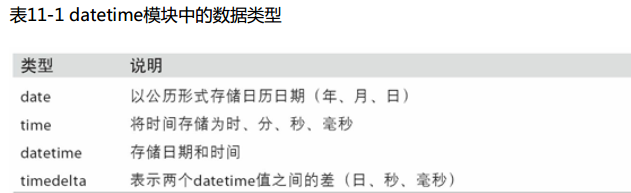

# str format time 与str present time

In [12]:
stamp = datetime(2011, 1, 3)
str(stamp)
ret = stamp.strftime('%Y-%m-%d')
print(ret)
type(ret)

2011-01-03


str

str格式化时间。全部格式化编码如下：
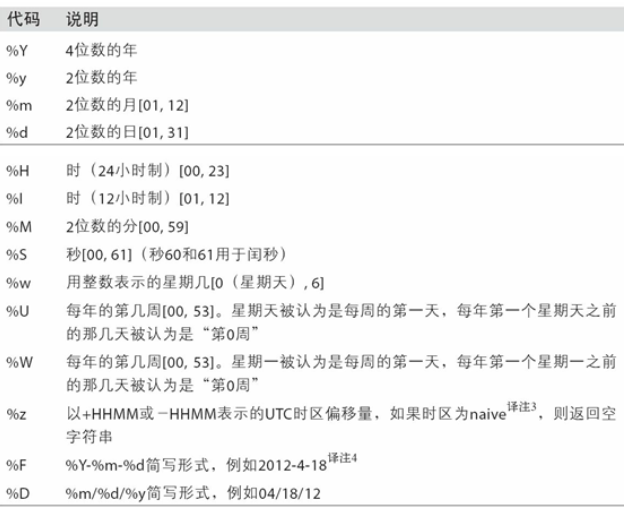

In [13]:
value = '2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

- 第三方包dateutile.parser.parse解析字符成日期

In [14]:
from dateutil.parser import parse
parse('2012-02-3')

datetime.datetime(2012, 2, 3, 0, 0)

- 日期在月前面，国际通用格式中常见。使用dayfirst=True

In [16]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [18]:
import pandas as pd
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

- 可以处理缺失值（None、空字符串等）

In [20]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [21]:
# 注意第3位为NaT
idx[2]

NaT

In [22]:
pd.isnull(idx)

array([False, False,  True])

- NaT是pandas中时间戳数据的null值

## 11.2 时间序列基础

In [25]:
from datetime import datetime
import numpy as np
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [26]:
ts = pd.Series(np.random.randn(6),index=dates)

In [27]:
ts

2011-01-02   -0.783884
2011-01-05   -0.825366
2011-01-07   -1.743269
2011-01-08    0.788467
2011-01-10    1.437339
2011-01-12    2.441472
dtype: float64

- DattetimeIndex

In [28]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

- pandas用NumPy的datetime64数据类型以纳秒形式存储时间戳

In [29]:
ts.index.dtype

dtype('<M8[ns]')

- DatetimeIndex中的各个标量值是pandas的Timestamp对象

In [32]:
ts.index[0]

Timestamp('2011-01-02 00:00:00')

- 索引、选取、子集构造

In [33]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [34]:
ts[stamp]

-1.7432692640253022

- 传入一个可以被解释为日期的字符串，调用值

In [35]:
ts['1/10/2011']

1.4373389814244077

In [36]:
ts['20110110']

1.4373389814244077

- 较长的时间序列，只需传入“年”或“年月”即可轻松选取数据的切片

In [39]:
longer_str = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))
longer_str

2000-01-01    0.082095
2000-01-02    0.128608
2000-01-03    0.959803
2000-01-04    0.889787
2000-01-05    0.155001
2000-01-06    1.366289
2000-01-07   -0.695990
2000-01-08    0.281038
2000-01-09    0.724774
2000-01-10    0.371417
2000-01-11    0.768992
2000-01-12    2.439539
2000-01-13    2.635264
2000-01-14   -1.458495
2000-01-15   -0.022571
2000-01-16    1.295747
2000-01-17   -0.822191
2000-01-18    0.842890
2000-01-19   -1.246698
2000-01-20   -1.364763
2000-01-21    0.770031
2000-01-22    1.599104
2000-01-23    0.299287
2000-01-24    1.127715
2000-01-25   -0.254744
2000-01-26    0.072857
2000-01-27    0.599432
2000-01-28   -1.144896
2000-01-29   -1.546183
2000-01-30    0.575157
                ...   
2002-08-28   -0.763680
2002-08-29   -0.766920
2002-08-30    2.004363
2002-08-31   -0.018717
2002-09-01   -0.361394
2002-09-02    0.769465
2002-09-03   -0.814295
2002-09-04    0.496879
2002-09-05    0.904328
2002-09-06    0.443573
2002-09-07    0.204278
2002-09-08   -0.067742
2002-09-09 

In [42]:
longer_str['2001']

2001-01-01   -0.420280
2001-01-02   -0.473748
2001-01-03   -0.776465
2001-01-04    0.524262
2001-01-05    0.448033
2001-01-06    1.395623
2001-01-07    0.535406
2001-01-08    0.351990
2001-01-09    0.372233
2001-01-10    0.605056
2001-01-11   -0.446600
2001-01-12    0.521703
2001-01-13    0.714542
2001-01-14    0.992022
2001-01-15    0.734367
2001-01-16   -0.052378
2001-01-17   -1.567271
2001-01-18   -2.193723
2001-01-19   -0.449532
2001-01-20    0.505416
2001-01-21   -0.314062
2001-01-22    0.297578
2001-01-23   -0.629280
2001-01-24    0.264439
2001-01-25    0.221006
2001-01-26    1.347146
2001-01-27    0.020233
2001-01-28   -0.076315
2001-01-29    1.438380
2001-01-30    0.259889
                ...   
2001-12-02   -1.453153
2001-12-03    0.307252
2001-12-04    0.503898
2001-12-05    0.482875
2001-12-06   -1.066009
2001-12-07    1.315379
2001-12-08    1.132768
2001-12-09    1.675177
2001-12-10    0.699309
2001-12-11   -1.585821
2001-12-12    0.868800
2001-12-13   -0.839688
2001-12-14 

In [43]:
# 根据年月选取
longer_str['2001-5']

2001-05-01    0.714552
2001-05-02    1.866012
2001-05-03   -1.686469
2001-05-04    0.833478
2001-05-05   -0.195910
2001-05-06    1.224210
2001-05-07   -0.697215
2001-05-08    0.083889
2001-05-09   -0.670711
2001-05-10    0.371835
2001-05-11   -0.730093
2001-05-12   -0.760615
2001-05-13   -1.769373
2001-05-14    0.533012
2001-05-15   -0.568354
2001-05-16   -0.966560
2001-05-17    0.037344
2001-05-18   -0.484878
2001-05-19   -1.636677
2001-05-20   -0.446636
2001-05-21    0.109255
2001-05-22    0.744758
2001-05-23   -0.322967
2001-05-24    0.027700
2001-05-25    0.748692
2001-05-26   -0.073422
2001-05-27    0.621755
2001-05-28    1.639196
2001-05-29    0.614322
2001-05-30   -0.835158
2001-05-31    0.329753
Freq: D, dtype: float64

- datetime对象切片

In [44]:
ts[datetime(2011,1,7):]

2011-01-07   -1.743269
2011-01-08    0.788467
2011-01-10    1.437339
2011-01-12    2.441472
dtype: float64

- 也可以用不存在于该时
间序列中的时间戳对其进行切片

In [45]:
ts

2011-01-02   -0.783884
2011-01-05   -0.825366
2011-01-07   -1.743269
2011-01-08    0.788467
2011-01-10    1.437339
2011-01-12    2.441472
dtype: float64

In [46]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.743269
2011-01-08    0.788467
2011-01-10    1.437339
dtype: float64

In [50]:
ts['2011-01-06':]  #

2011-01-07   -1.743269
2011-01-08    0.788467
2011-01-10    1.437339
2011-01-12    2.441472
dtype: float64

In [52]:
ts['20110106':]

2011-01-07   -1.743269
2011-01-08    0.788467
2011-01-10    1.437339
2011-01-12    2.441472
dtype: float64

- truncate方法截取日期

In [53]:
ts.truncate(after='20110109') #之后的行都截掉

2011-01-02   -0.783884
2011-01-05   -0.825366
2011-01-07   -1.743269
2011-01-08    0.788467
dtype: float64

In [58]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df= pd.DataFrame(np.random.randn(100,4),
                     index=dates,columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

In [59]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,1.015411,-0.385115,2.824359,1.403446
2001-05-09,0.081349,0.487778,0.394617,2.902024
2001-05-16,0.816799,-0.091882,0.270637,2.203559
2001-05-23,0.569241,2.100991,-0.267655,-1.107304
2001-05-30,0.527721,0.521286,0.586112,1.379707


## 带有重复索引的时间序列
在某些应用场景中，可能会存在多个观测数据落在同一个时间点上的情况

In [60]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [62]:
dup_ts.index.is_unique

False

- 对这个时间序列进行索引，要么产生标量值，要么产生切片，具体要看所选的时间
点是否重复：

In [63]:
dup_ts['1/3/2000']

4

In [64]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

- 假设你想要对具有非唯一时间戳的数据进行聚合。一个办法是使用groupby，并传
入level=0

In [71]:
grouped = dup_ts.groupby(level=0)
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [72]:
grouped.first()

2000-01-01    0
2000-01-02    1
2000-01-03    4
dtype: int32

In [73]:
dir(grouped)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_aggregate_named',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_bool_agg',
 '_builtin_table',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_def_str',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_fill',
 '_get_cythonized_result',
 '_get_index',
 '_get_indices',
 '_gotitem',
 '_group_selection',
 '_internal_names',
 '_inter

# 11.3 日期的范围、频率以及移动
- pandas中的原生时间序列一般被认为是不规则的，也就是说，它们没有固定的频
率。对于大部分应用程序而言，这是无所谓的。
- 但是，它常常需要以某种相对固定
的频率进行分析，比如每日、每月、每15分钟等（这样自然会在时间序列中引入
缺失值）。
- 幸运的是，pandas有一整套标准时间序列频率以及用于重采样、频率
推断、生成固定频率日期范围的工具。
- 例如，我们可以将之前那个时间序列转换为
一个具有固定频率（每日）的时间序列，只需调用resample即可

In [74]:
ts

2011-01-02   -0.783884
2011-01-05   -0.825366
2011-01-07   -1.743269
2011-01-08    0.788467
2011-01-10    1.437339
2011-01-12    2.441472
dtype: float64

In [77]:
resampler = ts.resample('D')
dir(resampler)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_adjust_binner_for_upsample',
 '_agg_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_loffset',
 '_apply_whitelist',
 '_assure_grouper',
 '_attributes',
 '_builtin_table',
 '_concat_objects',
 '_constructor',
 '_convert_obj',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_downsample',
 '_from_selection',
 '_get_binner',
 '_get_binner_for_time',
 '_get_index',
 '_get_indices',
 '_get_resampler_for_grouping',
 '_gotitem',

In [85]:
resampler.interpolate


<bound method Resampler.interpolate of DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]>

In [88]:
index = pd.date_range('20120401','2012-06-1')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

- 默认情况下，data_range产生的是频率为每天的时间点。
- 如果只传入起始或结束日
期，那就还得传入一个表示一段时间的数字

In [89]:
pd.date_range(start='2012-04-1',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [92]:
pd.date_range(end='2012-4-1',periods=20)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-17', '2012-03-18', '2012-03-19', '2012-03-20',
               '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-24',
               '2012-03-25', '2012-03-26', '2012-03-27', '2012-03-28',
               '2012-03-29', '2012-03-30', '2012-03-31', '2012-04-01'],
              dtype='datetime64[ns]', freq='D')

- 生成一个由每月最后一个工作日组成的日期索引，可以传入"BM"频率（表示business end of
month，表11-4是频率列表），这样就只会包含时间间隔内（或刚好在边界上
的）符合频率要求的日期：

pd.date_range('2000-01-01', '2000-12-01', freq='BM')

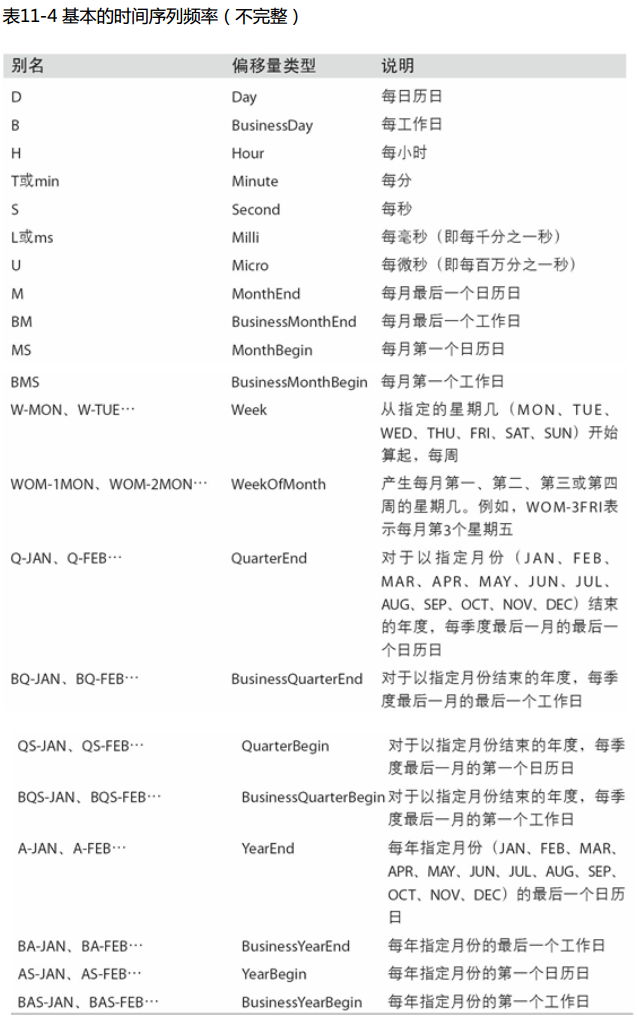

- date_range默认会保留起始和结束时间戳的时间信息（如果有的话）

In [95]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

- 有时，虽然起始和结束日期带有时间信息，但你希望产生一组被规范化
（normalize）到午夜的时间戳。normalize选项即可实现该功能：

In [96]:
pd.date_range('2012-05-02 12:56:31', periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 频率和日期偏移量
- pandas中的频率是由一个基础频率（base frequency）和一个乘数组成的。基础
频率通常以一个字符串别名表示，比如"M"表示每月，"H"表示每小时。对于每个基础频率，都有一个被称为日期偏移量（date offset）的对象与之对应。例如，
按小时计算的频率可以用Hour类表示

In [97]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [98]:
# 传入一个整数定义偏移量
four_hours = Hour(4)

four_hours

<4 * Hours>

- 一般来说，无需明确创建这样的对象，只需使用诸如"H"或"4H"这样的字符串别名
即可。在基础频率前面放上一个整数即可创建倍数

In [100]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [101]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

- 偏移量相加

In [102]:
Hour(2) + Minute(30)

<150 * Minutes>

- 同理，你也可以传入频率字符串（如"2h30min"），这种字符串可以被高效地解析
为等效的表达式：

In [104]:
pd.date_range('2000-1-1',periods=5,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='90T')

- 些频率所描述的时间点并不是均匀分隔的。例如，"M"（日历月末）
和"BM"（每月最后一个工作日）就取决于每月的天数，对于后者，还要考虑月末
是不是周末。由于没有更好的术语，我将这些称为锚点偏移量（anchored
offset）
- 时间序列的基础频率
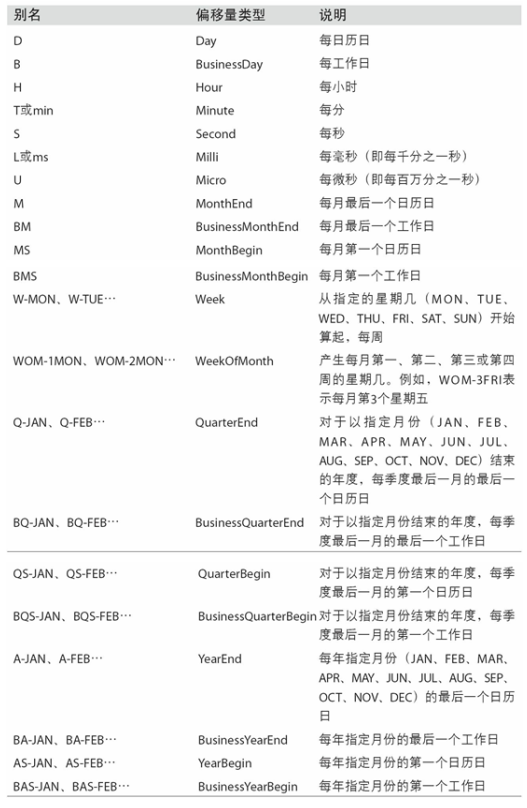

## WOM日期：week ofmonth
- 每月第3个星期五

In [107]:
rng = pd.date_range('2010-2-1','2010-10-1',freq='WOM-3fri')
rng

DatetimeIndex(['2010-02-19', '2010-03-19', '2010-04-16', '2010-05-21',
               '2010-06-18', '2010-07-16', '2010-08-20', '2010-09-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [109]:
rng = pd.date_range('2010-2-1','2010-10-1',freq='wom-3fri') #基础频率词不区分大小写
rng

DatetimeIndex(['2010-02-19', '2010-03-19', '2010-04-16', '2010-05-21',
               '2010-06-18', '2010-07-16', '2010-08-20', '2010-09-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### 移动（超前和滞后）数据
移动（shifting）指的是沿着时间轴将数据前移或后移。
- Series和DataFrame都有
一个shift方法用于执行单纯的前移或后移操作，保持索引不变：

In [110]:
ts = pd.Series(np.random.randn(4),index=pd.date_range('1/1/2010',periods=4,freq='M'))
ts

2010-01-31    0.998906
2010-02-28   -0.947944
2010-03-31    0.053791
2010-04-30    1.798296
Freq: M, dtype: float64

In [111]:
ts.shift(2)

2010-01-31         NaN
2010-02-28         NaN
2010-03-31    0.998906
2010-04-30   -0.947944
Freq: M, dtype: float64

In [112]:
ts.shift(-2)

2010-01-31    0.053791
2010-02-28    1.798296
2010-03-31         NaN
2010-04-30         NaN
Freq: M, dtype: float64

- shift通常用于计算一个时间序列或多个时间序列（如DataFrame的列）中的百分
比变化。可以这样表达：

In [113]:
ts/ts.shift(1) -1

2010-01-31          NaN
2010-02-28    -1.948982
2010-03-31    -1.056745
2010-04-30    32.431412
Freq: M, dtype: float64

- 由于单纯的移位操作不会修改索引，所以部分数据会被丢弃。因此，如果频率已
知，则可以将其传给shift以便实现对时间戳进行位移而不是对数据进行简单位移：

In [114]:
ts.shift(2,freq='M')

2010-03-31    0.998906
2010-04-30   -0.947944
2010-05-31    0.053791
2010-06-30    1.798296
Freq: M, dtype: float64

In [115]:
ts.shift(3,freq='M')

2010-04-30    0.998906
2010-05-31   -0.947944
2010-06-30    0.053791
2010-07-31    1.798296
Freq: M, dtype: float64

In [116]:
ts.shift(1,freq='90T')

2010-01-31 01:30:00    0.998906
2010-02-28 01:30:00   -0.947944
2010-03-31 01:30:00    0.053791
2010-04-30 01:30:00    1.798296
Freq: M, dtype: float64

## 通过偏移量对日期进行位移

In [117]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime.now()
now

datetime.datetime(2019, 3, 10, 12, 48, 27, 935500)

In [118]:
now +3*Day()

Timestamp('2019-03-13 12:48:27.935500')

- 果加的是锚点偏移量（比如MonthEnd），第一次增量会将原日期向前滚动到
符合频率规则的下一个日期：

In [119]:
now + MonthEnd()

Timestamp('2019-03-31 12:48:27.935500')

In [120]:
now + MonthEnd(1)

Timestamp('2019-03-31 12:48:27.935500')

In [121]:
now + MonthEnd(2)

Timestamp('2019-04-30 12:48:27.935500')

- rollback和rollforward方法

In [123]:
MonthEnd().rollforward(now)

Timestamp('2019-03-31 12:48:27.935500')

In [124]:
MonthEnd().rollback(now)

Timestamp('2019-02-28 12:48:27.935500')

In [122]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.892728
2000-01-19    0.320053
2000-01-23   -0.567218
2000-01-27    0.089853
2000-01-31   -0.359186
2000-02-04   -0.293787
2000-02-08    0.575118
2000-02-12   -0.765287
2000-02-16   -1.677738
2000-02-20    0.296660
2000-02-24    1.346130
2000-02-28    0.814889
2000-03-03   -0.778720
2000-03-07    0.182512
2000-03-11    0.555572
2000-03-15   -0.537959
2000-03-19    2.045918
2000-03-23   -0.392481
2000-03-27    1.042034
2000-03-31    1.766003
Freq: 4D, dtype: float64

In [126]:
offset = MonthEnd()
ts.groupby(offset.rollback).mean()

1999-12-31    0.439108
2000-01-31   -0.065080
2000-02-29   -0.301065
2000-03-31   -1.359551
dtype: float64

- 上述效果更简单、更快速的方式是使用resample

In [127]:
ts.resample('M').mean()

2000-01-31    0.181524
2000-02-29    0.046882
2000-03-31   -0.433376
Freq: M, dtype: float64

# 11.4 时区处理

In [130]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [156]:
tz = pd.Series(pytz.common_timezones)
tz[tz.str.contains('Asia')]

211             Asia/Aden
212           Asia/Almaty
213            Asia/Amman
214           Asia/Anadyr
215            Asia/Aqtau
216           Asia/Aqtobe
217         Asia/Ashgabat
218           Asia/Atyrau
219          Asia/Baghdad
220          Asia/Bahrain
221             Asia/Baku
222          Asia/Bangkok
223          Asia/Barnaul
224           Asia/Beirut
225          Asia/Bishkek
226           Asia/Brunei
227            Asia/Chita
228       Asia/Choibalsan
229          Asia/Colombo
230         Asia/Damascus
231            Asia/Dhaka
232             Asia/Dili
233            Asia/Dubai
234         Asia/Dushanbe
235        Asia/Famagusta
236             Asia/Gaza
237           Asia/Hebron
238      Asia/Ho_Chi_Minh
239        Asia/Hong_Kong
240             Asia/Hovd
              ...        
263             Asia/Omsk
264             Asia/Oral
265       Asia/Phnom_Penh
266        Asia/Pontianak
267        Asia/Pyongyang
268            Asia/Qatar
269        Asia/Qyzylorda
270         

In [150]:
# 获取时区对象
pytz.timezone("America/Araguaina")

<DstTzInfo 'America/Araguaina' LMT-1 day, 20:47:00 STD>

## 时区本地化和转换
默认情况下，pandas中的时间序列是单纯（naive）的时区

In [151]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.171231
2012-03-10 09:30:00    0.144435
2012-03-11 09:30:00    1.082563
2012-03-12 09:30:00    0.316569
2012-03-13 09:30:00    0.899764
2012-03-14 09:30:00    0.092583
Freq: D, dtype: float64

In [153]:
# 时区属性
print(ts.index.tz)

None


In [154]:
# 格林威治时间
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

- pd.date_range的tz选项

In [157]:
# 上海时区
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='Asia/Shanghai')
# Asia/Shanghai

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00',
               '2012-03-15 09:30:00+08:00', '2012-03-16 09:30:00+08:00',
               '2012-03-17 09:30:00+08:00', '2012-03-18 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

- 从单纯到本地化的转换是通过tz_localize方法处理的：

In [159]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.171231
2012-03-10 09:30:00+00:00    0.144435
2012-03-11 09:30:00+00:00    1.082563
2012-03-12 09:30:00+00:00    0.316569
2012-03-13 09:30:00+00:00    0.899764
2012-03-14 09:30:00+00:00    0.092583
Freq: D, dtype: float64

- 无时区原始时间转成带时区的用tz_locallize()方法；时区格式时间互相转换使用tz_convert()方法

In [160]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [164]:
ts_utc.tz_convert('Asia/Shanghai')

2012-03-09 17:30:00+08:00   -0.171231
2012-03-10 17:30:00+08:00    0.144435
2012-03-11 17:30:00+08:00    1.082563
2012-03-12 17:30:00+08:00    0.316569
2012-03-13 17:30:00+08:00    0.899764
2012-03-14 17:30:00+08:00    0.092583
Freq: D, dtype: float64

In [165]:
ts_utc.index.tz_convert('Asia/Shanghai')

DatetimeIndex(['2012-03-09 17:30:00+08:00', '2012-03-10 17:30:00+08:00',
               '2012-03-11 17:30:00+08:00', '2012-03-12 17:30:00+08:00',
               '2012-03-13 17:30:00+08:00', '2012-03-14 17:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 操作时区意识型?Timestamp对象

- 原始timestamp对象-》time zone-aware时区意识型-》时区间互相转换
- pd.Timestamp ->  .tz_localize() ->tz_convert

In [167]:
stamp = pd.Timestamp('2019-03-11 10:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2019-03-11 06:00:00-0400', tz='America/New_York')

In [168]:
# 使用tz选项
stamp_moscow = pd.Timestamp('2019-03-11 10:00',tz='Europe/Moscow')
stamp_moscow

Timestamp('2019-03-11 10:00:00+0300', tz='Europe/Moscow')

- 时间戳值value属性

In [169]:
stamp.value

1552298400000000000

In [170]:
stamp_moscow.value

1552287600000000000

In [171]:
stamp.tz_convert('Europe/Moscow').value

TypeError: Cannot convert tz-naive Timestamp, use tz_localize to localize

In [172]:
stamp_utc.tz_convert('Europe/Moscow').value

1552298400000000000

In [173]:
stamp_utc.value

1552298400000000000

## 不同时区之间的运算
- 如果两个时间序列的时区不同，在将它们合并到一起时，最终结果就会是UTC。
- 由于时间戳其实是以UTC存储的，所以这是一个很简单的运算，并不需要发生任何转换：

In [174]:
rng = pd.date_range('20190311 9:30',periods=10,freq="B")
ts = pd.Series(np.random.randn(len(rng)), index=rng,)
ts

2019-03-11 09:30:00    0.155299
2019-03-12 09:30:00   -0.304658
2019-03-13 09:30:00    0.995672
2019-03-14 09:30:00   -0.997262
2019-03-15 09:30:00    0.021483
2019-03-18 09:30:00   -0.590345
2019-03-19 09:30:00   -0.542231
2019-03-20 09:30:00    1.412168
2019-03-21 09:30:00   -0.883107
2019-03-22 09:30:00   -0.996720
Freq: B, dtype: float64

In [178]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts[2:].tz_localize('Europe/Moscow')
ts3 = ts1[2:].tz_convert('Europe/Moscow')
res = ts1 + ts2

In [176]:
res.index

DatetimeIndex(['2019-03-11 09:30:00+00:00', '2019-03-12 09:30:00+00:00',
               '2019-03-13 06:30:00+00:00', '2019-03-13 09:30:00+00:00',
               '2019-03-14 06:30:00+00:00', '2019-03-14 09:30:00+00:00',
               '2019-03-15 06:30:00+00:00', '2019-03-15 09:30:00+00:00',
               '2019-03-18 06:30:00+00:00', '2019-03-18 09:30:00+00:00',
               '2019-03-19 06:30:00+00:00', '2019-03-19 09:30:00+00:00',
               '2019-03-20 06:30:00+00:00', '2019-03-21 06:30:00+00:00',
               '2019-03-22 06:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [181]:
res2 = ts1 + ts3

res2

2019-03-11 09:30:00+00:00         NaN
2019-03-12 09:30:00+00:00         NaN
2019-03-13 09:30:00+00:00    1.991343
2019-03-14 09:30:00+00:00   -1.994524
2019-03-15 09:30:00+00:00    0.042967
2019-03-18 09:30:00+00:00   -1.180691
2019-03-19 09:30:00+00:00   -1.084462
Freq: B, dtype: float64

In [182]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
print(ts2)
result = ts1 + ts2
result.index

2019-03-13 12:30:00+03:00    0.995672
2019-03-14 12:30:00+03:00   -0.997262
2019-03-15 12:30:00+03:00    0.021483
2019-03-18 12:30:00+03:00   -0.590345
2019-03-19 12:30:00+03:00   -0.542231
Freq: B, dtype: float64


DatetimeIndex(['2019-03-11 09:30:00+00:00', '2019-03-12 09:30:00+00:00',
               '2019-03-13 09:30:00+00:00', '2019-03-14 09:30:00+00:00',
               '2019-03-15 09:30:00+00:00', '2019-03-18 09:30:00+00:00',
               '2019-03-19 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# 11.5 时期及其算术运算
- 时期（period）表示的是时间区间，比如数日、数月、数季、数年等。
- Period类所表示的就是这种数据类型，其构造函数需要用到一个字符串或整数，以及频率：

In [189]:
p = pd.Period(2019,freq='A-DEC')
p

Period('2019', 'A-DEC')

In [190]:
p+5

Period('2024', 'A-DEC')

- 如果两个Period对象拥有相同的频率，则它们的差就是它们之间的单位数量：

In [191]:
pd.Period('2014', freq='A-DEC') - p

-5

- pd.period_range()

In [192]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [193]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.674280
2000-02   -1.842793
2000-03   -0.078975
2000-04   -0.630799
2000-05    0.708712
2000-06   -0.799722
Freq: M, dtype: float64

## 时期的频率转换
Period和PeriodIndex对象都可以通过其asfreq方法被转换成别的频率。假设我们有一个年度时期，希望将其转换为当年年初或年末的一个月度时期

In [194]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [195]:
p.asfreq("M",how='start')

Period('2007-01', 'M')

In [196]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [199]:
pd.date_range('2007','2018', freq='A-DEC')

DatetimeIndex(['2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [201]:
p.asfreq('A-JUN','start')

Period('2007', 'A-JUN')

In [204]:
p.asfreq('A-JUN','start').asfreq('M','start')

Period('2006-07', 'M')

- 在将高频率转换为低频率时，超时期（superperiod）是由子时期（subperiod）
所属的位置决定的。例如，在A-JUN频率中，月份“2007年8月”实际上是属于周
期“2008年”的：

In [205]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [207]:
p = pd.Period('Apr-2007', 'M')
p.asfreq('A-DEC')

Period('2007', 'A-DEC')

## 按季度计算的时期频率
季度型数据在会计、金融等领域中很常见。许多季度型数据都会涉及“财年末”的
概念，通常是一年12个月中某月的最后一个日历日或工作日。就这一点来说，时
期"2012Q4"根据财年末的不同会有不同的含义。pandas支持12种可能的季度型
频率，即Q-JAN到Q-DEC：

In [209]:
p = pd.Period('2012Q4',freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [210]:
p = pd.Period('2012',freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

- 在以1月结束的财年中，2012Q4是从11月到1月（将其转换为日型频率就明白
了）。

In [211]:
p.asfreq('M','start')

Period('2011-11', 'M')

In [212]:
p.asfreq('M','end')

Period('2012-01', 'M')

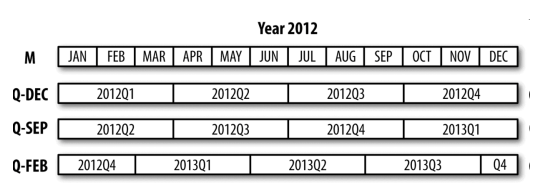

In [ ]:
from pandas.tseries.offsets import MonthEnd, Day

In [223]:
p = pd.Period('2012Q4',freq='Q-JAN')
print(p.asfreq('D','e'))
p2 = (p.asfreq('M') + 3).asfreq('Q')
print(p2)
print(p2.asfreq('D','s'))

2012-01-31
2012Q2
2012-04-01


- 因此，Period之间的算术运算会非常简单。例如，要获取该季度倒数第二个工作
日下午4点的时间戳

In [224]:
p4pm = (p.asfreq('M','e')-1).asfreq('H','s') + 16
p4pm

Period('2011-12-01 16:00', 'H')

## 将Timestamp转换为Period（及其反向过程）
通过使用to_period方法，可以将由时间戳索引的Series和DataFrame对象转换为
以时期索引

In [225]:
rng = pd.date_range('2019-01-1',periods=3,freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2019-01-31   -0.110803
2019-02-28    0.140596
2019-03-31   -0.568671
Freq: M, dtype: float64

In [227]:
pts = ts.to_period()
pts

2019-01   -0.110803
2019-02    0.140596
2019-03   -0.568671
Freq: M, dtype: float64

In [228]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    1.582212
2000-01-30    0.647616
2000-01-31    1.935625
2000-02-01   -0.881121
2000-02-02   -1.095466
2000-02-03   -0.669460
Freq: D, dtype: float64

In [229]:
ts2.to_period()

2000-01-29    1.582212
2000-01-30    0.647616
2000-01-31    1.935625
2000-02-01   -0.881121
2000-02-02   -1.095466
2000-02-03   -0.669460
Freq: D, dtype: float64

In [230]:
pts = ts2.to_period()
pts.to_timestamp()

2000-01-29    1.582212
2000-01-30    0.647616
2000-01-31    1.935625
2000-02-01   -0.881121
2000-02-02   -1.095466
2000-02-03   -0.669460
Freq: D, dtype: float64

## 通过数组创建PeriodIndex
固定频率的数据集通常会将时间信息分开存放在多个列中。

In [231]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [232]:
data['year'] is data.year

True

In [233]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [234]:
data.quarter.head()

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

- 通过将这些数组以及一个频率传入PeriodIndex，就可以将它们合并成DataFrame
的一个索引

In [235]:
index = pd.PeriodIndex(year=data.year,quarter=data.quarter,)
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

填写freq参数的形式如下

In [236]:
index = pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [237]:
data.index = index

In [238]:
data.info

<bound method DataFrame.info of           year  quarter    realgdp  realcons   realinv  realgovt  realdpi  \
1959Q1  1959.0      1.0   2710.349    1707.4   286.898   470.045   1886.9   
1959Q2  1959.0      2.0   2778.801    1733.7   310.859   481.301   1919.7   
1959Q3  1959.0      3.0   2775.488    1751.8   289.226   491.260   1916.4   
1959Q4  1959.0      4.0   2785.204    1753.7   299.356   484.052   1931.3   
1960Q1  1960.0      1.0   2847.699    1770.5   331.722   462.199   1955.5   
1960Q2  1960.0      2.0   2834.390    1792.9   298.152   460.400   1966.1   
1960Q3  1960.0      3.0   2839.022    1785.8   296.375   474.676   1967.8   
1960Q4  1960.0      4.0   2802.616    1788.2   259.764   476.434   1966.6   
1961Q1  1961.0      1.0   2819.264    1787.7   266.405   475.854   1984.5   
1961Q2  1961.0      2.0   2872.005    1814.3   286.246   480.328   2014.4   
1961Q3  1961.0      3.0   2918.419    1823.1   310.227   493.828   2041.9   
1961Q4  1961.0      4.0   2977.830    1859.6

In [239]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 11.6 重采样及频率转换
- 重采样（resampling）指的是将时间序列从一个频率转换到另一个频率的处理过程。
- 将高频率数据聚合到低频率称为降采样（downsampling），
- 而将低频率数据转换到高频率则称为升采样（upsampling）。
- 并不是所有的重采样都能被划分到这两个大类中。例如，将W-WED（每周三）转换为W-FRI既不是降采样也不是
升采样。
-
-
pandas对象都带有一个resample方法，它是各种频率转换工作的主力函数。
resample有一个类似于groupby的API，调用resample可以分组数据，然后会调
用一个聚合函数：

In [240]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.604255
2000-01-02    0.761323
2000-01-03   -0.756292
2000-01-04   -0.222627
2000-01-05    0.124129
2000-01-06   -0.665090
2000-01-07    0.285475
2000-01-08    0.441892
2000-01-09   -0.032838
2000-01-10    2.144812
2000-01-11    0.523512
2000-01-12   -0.986145
2000-01-13   -0.177442
2000-01-14   -1.507452
2000-01-15   -1.072788
2000-01-16    1.189121
2000-01-17   -0.633241
2000-01-18   -0.448875
2000-01-19   -1.984391
2000-01-20   -0.246871
2000-01-21    0.950225
2000-01-22    0.840293
2000-01-23    0.999427
2000-01-24   -0.016553
2000-01-25   -0.767920
2000-01-26   -1.190065
2000-01-27   -1.064523
2000-01-28   -0.025685
2000-01-29    0.643522
2000-01-30    1.214684
                ...   
2000-03-11   -0.062661
2000-03-12    2.057871
2000-03-13    0.631580
2000-03-14    0.958995
2000-03-15    0.005871
2000-03-16   -0.314183
2000-03-17    0.718555
2000-03-18   -0.166522
2000-03-19   -2.476205
2000-03-20   -0.481119
2000-03-21    0.764892
2000-03-22    0.694401
2000-03-23 

In [241]:
ts.resample('M')

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [242]:
ts.resample('M').mean()

2000-01-31   -0.064309
2000-02-29   -0.009842
2000-03-31    0.012913
2000-04-30    0.440711
Freq: M, dtype: float64

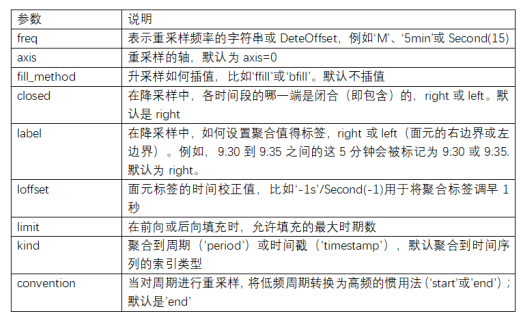

## 降采样
将数据聚合到规律的低频率是一件非常普通的时间序列处理任务。待聚合的数据不
必拥有固定的频率，期望的频率会自动定义聚合的面元边界，这些面元用于将时间
序列拆分为多个片段。例如，要转换到月度频率（'M'或'BM'），数据需要被划分
到多个单月时间段中。各时间段都是半开放的。一个数据点只能属于一个时间段，
所有时间段的并集必须能组成整个时间帧。在用resample对数据进行降采样时，
需要考虑两样东西：
- 各区间哪边是闭合的。
- 如何标记各个聚合面元，用区间的开头还是末尾。

In [243]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [244]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [247]:
ts.resample('5min', closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [248]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

好图好图！！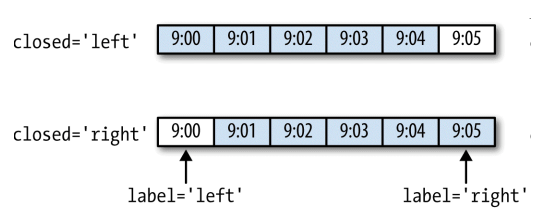

- 最后，你可能希望对结果索引做一些位移，比如从右边界减去一秒以便更容易明白
该时间戳到底表示的是哪个区间。只需通过loffset设置一个字符串或日期偏移量即
可实现这个目的

In [249]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [250]:
ts.resample('5min', closed='right',
            label='right', loffset='1s').sum()

2000-01-01 00:00:01     0
2000-01-01 00:05:01    15
2000-01-01 00:10:01    40
2000-01-01 00:15:01    11
Freq: 5T, dtype: int32

- 对比shift效果

In [258]:
ts.shift(-1,freq='S').resample('5min', closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [259]:
ts.shift(1)

2000-01-01 00:00:00     NaN
2000-01-01 00:01:00     0.0
2000-01-01 00:02:00     1.0
2000-01-01 00:03:00     2.0
2000-01-01 00:04:00     3.0
2000-01-01 00:05:00     4.0
2000-01-01 00:06:00     5.0
2000-01-01 00:07:00     6.0
2000-01-01 00:08:00     7.0
2000-01-01 00:09:00     8.0
2000-01-01 00:10:00     9.0
2000-01-01 00:11:00    10.0
Freq: T, dtype: float64

## OHLC重采样：
金融领域中有一种无所不在的时间序列聚合方式，即计算各面元的四个值：第一个
值（open，开盘）、最后一个值（close，收盘）、最大值（high，最高）以及
最小值（low，最低）。传入how='ohlc'即可得到一个含有这四种聚合值的
DataFrame。整个过程很高效，只需一次扫描即可计算出结果：

In [260]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## 升采样和插值
在将数据从低频率转换到高频率时，就不需要聚合了。我们来看一个带有一些周型
数据的DataFrame：

In [261]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.992667,-0.217027,-0.464206,0.549886
2000-01-12,-2.390786,-0.109654,0.573877,1.045585


当你对这个数据进行聚合，每组只有一个值，这样就会引入缺失值。我们使用
asfreq方法转换成高频，不经过聚合：

In [263]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.992667,-0.217027,-0.464206,0.549886
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-2.390786,-0.109654,0.573877,1.045585


- 假设你想要用前面的周型值填充“非星期三”。resampling的填充和插值方式跟
fillna和reindex的一样

In [265]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.992667,-0.217027,-0.464206,0.549886
2000-01-06,0.992667,-0.217027,-0.464206,0.549886
2000-01-07,0.992667,-0.217027,-0.464206,0.549886
2000-01-08,0.992667,-0.217027,-0.464206,0.549886
2000-01-09,0.992667,-0.217027,-0.464206,0.549886
2000-01-10,0.992667,-0.217027,-0.464206,0.549886
2000-01-11,0.992667,-0.217027,-0.464206,0.549886
2000-01-12,-2.390786,-0.109654,0.573877,1.045585


- 使用limit参数可以只填充指定的时期数（目的是限制前面的观测值的持续使用距
离）

In [266]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.992667,-0.217027,-0.464206,0.549886
2000-01-06,0.992667,-0.217027,-0.464206,0.549886
2000-01-07,0.992667,-0.217027,-0.464206,0.549886
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-2.390786,-0.109654,0.573877,1.045585


In [267]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.173140,1.387421,-0.110364,2.391100
2000-02,-1.209416,0.299319,0.588909,0.875510
2000-03,-1.211069,-0.690016,-0.522926,0.341057
2000-04,0.714252,-0.224229,0.038570,-0.051945
2000-05,-0.692472,-0.412720,-1.727279,0.751477


In [268]:
frame.resample("A-DEC").mean()

,Colorado,Texas,New York,Ohio
2000,0.535690,-0.318782,-0.572105,0.151141
2001,0.012703,-0.590011,0.124115,-0.559300


In [271]:
annual_frame = frame.resample("Y").mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.535690,-0.318782,-0.572105,0.151141
2001,0.012703,-0.590011,0.124115,-0.559300


升采样要稍微麻烦一些，因为你必须决定在新频率中各区间的哪端用于放置原来的
值，就像asfreq方法那样。convention参数默认为'start'，也可设置为'end'：

In [273]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').asfreq('Q-DEC')

,Colorado,Texas,New York,Ohio
2000Q1,0.535690,-0.318782,-0.572105,0.151141
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.012703,-0.590011,0.124115,-0.559300
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [274]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.535690,-0.318782,-0.572105,0.151141
2000Q2,0.535690,-0.318782,-0.572105,0.151141
2000Q3,0.535690,-0.318782,-0.572105,0.151141
2000Q4,0.535690,-0.318782,-0.572105,0.151141
2001Q1,0.012703,-0.590011,0.124115,-0.559300
2001Q2,0.012703,-0.590011,0.124115,-0.559300
2001Q3,0.012703,-0.590011,0.124115,-0.559300
2001Q4,0.012703,-0.590011,0.124115,-0.559300


In [275]:
annual_frame.resample('Q-DEC',convention='e').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.535690,-0.318782,-0.572105,0.151141
2001Q1,0.535690,-0.318782,-0.572105,0.151141
2001Q2,0.535690,-0.318782,-0.572105,0.151141
2001Q3,0.535690,-0.318782,-0.572105,0.151141
2001Q4,0.012703,-0.590011,0.124115,-0.559300


由于时期指的是时间区间，所以升采样和降采样的规则就比较严格：
- 在降采样中，目标频率必须是源频率的子时期（subperiod）。
- 在升采样中，目标频率必须是源频率的超时期（superperiod）。
- 如果不满足这些条件，就会引发异常。这主要影响的是按季、年、周计算的频率。
例如，由Q-MAR定义的时间区间只能升采样为A-MAR、A-JUN、A-SEP、ADEC等：

# 11.7 移动窗口函数
在移动窗口（可以带有指数衰减权数）上计算的各种统计函数也是一类常见于时间
序列的数组变换。这样可以圆滑噪音数据或断裂数据。我将它们称为移动窗口函数
（moving window function），其中还包括那些窗口不定长的函数（如指数加权
移动平均）。跟其他统计函数一样，移动窗口函数也会自动排除缺失值。
开始之前，我们加载一些时间序列数据，将其重采样为工作日频率：

In [303]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [304]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head(10)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [305]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']].resample('B').ffill()
close_px.head(10)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


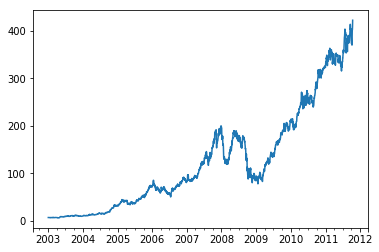

In [306]:
close_px.AAPL.plot()

In [307]:
close_px.AAPL.shape

(2292,)

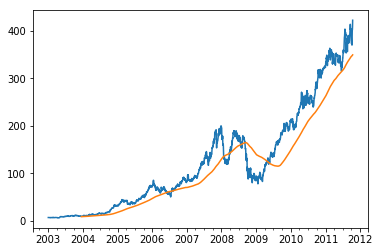

In [312]:
import matplotlib.pyplot as plt
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()
# plt.show()

- 默认情况下，rolling函数需要窗口中所有的值为非NA值。可以修改该行为以解决
缺失数据的问题。其实，在时间序列开始处尚不足窗口期的那些数据就是个特例

In [316]:
# min_periods参数
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std() #
appl_std250[:12]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

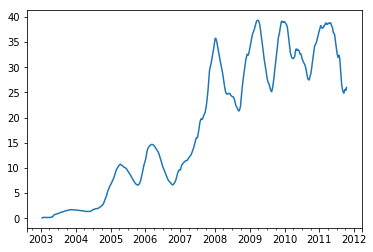

In [317]:
appl_std250.plot()

- 要计算扩展窗口平均（expanding window mean），可以使用expanding而不
是rolling。“扩展”意味着，从时间序列的起始处开始窗口，增加窗口直到它超
过所有的序列。apple_std250时间序列的扩展窗口平均如下所示：

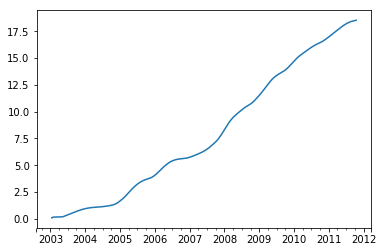

In [319]:
expanding_mean = appl_std250.expanding().mean()
expanding_mean.plot()

- 对DataFrame调用rolling_mean（以及与之类似的函数）会将转换应用到所有的
列上

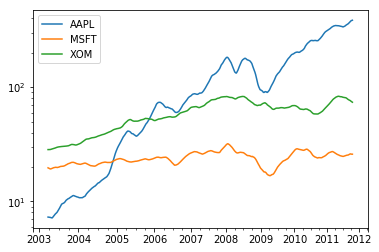

In [323]:
close_px.rolling(60).mean().plot(logy=True,logx=True)

- 固定大小时间补偿字符串,处理不规律的时间序列

In [324]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


##  指数加权函数

- 另一种使用固定大小窗口及相等权数观测值的办法是，定义一个衰减因子（decay
factor）常量，以便使近期的观测值拥有更大的权数。
- 衰减因子的定义方式有很多，比较流行的是使用时间间隔（span），它可以使结果兼容于窗口大小等于时
间间隔的简单移动窗口（simple moving window）函数。
- 由于指数加权统计会赋予近期的观测值更大的权数，因此相对于等权统计，它
能“适应”更快的变化。
- 除了rolling和expanding，pandas还有ewm运算符。下面这个例子对比了苹果公
司股价的30日移动平均和span=30的指数加权移动平均